Check of derivatives of a normal distribution and the residual terms in a $\chi^2$ of data compared to a normal distribution 

In [1]:
import sympy as sy
sy.init_printing()

In [2]:
x, y, delta, A, mu, sigma, = sy.symbols("x y delta A mu sigma",real=True)

Define the normal distribution as a function of the parameters $A$, $\mu$, and $\sigma$ (i.e., consider $x$ constant)

$$f(A,\mu,\sigma) = A\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac12\frac{(x-\mu)^2}{\sigma^2}}\quad.$$

In [3]:
f = sy.Lambda((A,mu,sigma),A/(sy.sqrt(2*sy.pi)*sigma)*sy.exp(-1/2*(x-mu)**2/sigma**2))

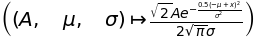

In [4]:
f

Confirm that 

$$\frac{\partial f}{\partial A} = \frac{1}{A}f(A,\mu,\sigma)\quad.$$

In [5]:
sy.diff(f(A,mu,sigma),A)-1/A*f(A,mu,sigma)

Confirm that

$$\frac{\partial f}{\partial\mu} = \frac{x-\mu}{\sigma^2}f(A,\mu,\sigma)\quad.$$

In [6]:
sy.simplify(sy.diff(f(A,mu,sigma),mu)-(x-mu)/(sigma**2)*f(A,mu,sigma))

Confirm that 

$$\frac{\partial f}{\partial\sigma} = \frac{(x-\mu)^2-\sigma^2}{\sigma^3}f(A,\mu,\sigma)\quad.$$

In [7]:
sy.simplify(sy.diff(f(A,mu,sigma),sigma)-((x-mu)**2-sigma**2)/sigma**3*f(A,mu,sigma))

Define the residual term 

$$r(A,\mu,\sigma) = \frac{y - f(A,\mu,\sigma)}{\delta}\quad.$$

In [8]:
r = sy.Lambda((A,mu,sigma), (y - f(A,mu,sigma))/delta)

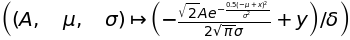

In [9]:
r

Confirm that 

$$\frac{\partial r}{\partial A} = -\frac{1}{A\delta}f(A,\mu,\sigma)
=-\frac{1}{\delta}\frac{\partial f}{\partial A}\quad.$$

In [10]:
sy.diff(r(A,mu,sigma),A)+1/(A*delta)*f(A,mu,sigma)

Confirm that 

$$\frac{\partial r}{\partial \mu} = -\frac{x-\mu}{\delta\sigma^2}f(A,\mu,\sigma)
=-\frac{1}{\delta}\frac{\partial f}{\partial\mu}\quad.$$

In [11]:
sy.simplify(sy.diff(r(A,mu,sigma),mu)+(x-mu)/(delta*sigma**2)*f(A,mu,sigma))

Confirm that 

$$\frac{\partial r}{\partial\sigma} = -\frac{(x-\mu)^2-\sigma^2}{\delta\sigma^3}f(A,\mu,\sigma)
=-\frac{1}{\delta}\frac{\partial f}{\partial\sigma}\quad.$$

In [12]:
sy.simplify(sy.diff(r(A,mu,sigma),sigma)+((mu-x)**2-sigma**2)/(delta*sigma**3)*f(A,mu,sigma))

Confirm that 

$$\frac{\partial r^2}{\partial A} = -2r(A,\mu,\sigma)\frac{1}{A\delta}f(A,\mu,\sigma)
=-\frac{2}{\delta}r(A,\mu,\sigma)\frac{\partial f}{\partial A}\quad.$$

In [13]:
sy.diff(r(A,mu,sigma)**2,A)+2*r(A,mu,sigma)/delta*1/A*f(A,mu,sigma)

Confirm that 

$$\frac{\partial r^2}{\partial \mu} = -2r(A,\mu,\sigma)\frac{x-\mu}{\delta\sigma^2}f(A,\mu,\sigma)
=-\frac{2}{\delta}r(A,\mu,\sigma)\frac{\partial f}{\partial\mu}\quad.$$

In [14]:
sy.simplify(sy.diff(r(A,mu,sigma)**2,mu)
            +2*r(A,mu,sigma)/delta*(x-mu)/sigma**2*f(A,mu,sigma))

Confirm that 

$$\frac{\partial r^2}{\partial\sigma} = -2r(A,\mu,\sigma)\frac{(x-\mu)^2-\sigma^2}{\delta\sigma^3}f(A,\mu,\sigma)
=-\frac{2}{\delta}r(A,\mu,\sigma)\frac{\partial f}{\partial\sigma}\quad.$$

In [15]:
sy.simplify(sy.diff(r(A,mu,sigma)**2,sigma)\
        +2*r(A,mu,sigma)/delta*((mu-x)**2-sigma**2)/sigma**3*f(A,mu,sigma))

Thus, we calculate the gradient of $\chi^2$ as 

$$\nabla\chi^2 = \sum_i \left.-2\frac{r(A,\mu,\sigma)}{\delta}f(A,\mu,\sigma)\begin{bmatrix} 
  \frac{1}{A}\\
  \frac{x-\mu}{\sigma^2}\\
  \frac{(x-\mu)^2-\sigma^2}{\sigma^3}\end{bmatrix}\right|_{x=x_i,y=y_i}$$
  